In [98]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

In [63]:
# ignore warnings
warnings.filterwarnings("ignore")


In [64]:
#  create avariable named reviews_df and load the data
reviews_df = pd.read_csv('rt.reviews.tsv', sep='\t', encoding='latin1')

In [65]:
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [66]:
#check the shape of our dataframe
reviews_df.shape

(54432, 8)

In [67]:
# check for info printout of the dataframe
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


From the info print out, there are missing values in the columns review,rating,critic and publisher. The missing values have to be handled before doing the data analysis.

### Data Cleaning

#### Missing Values

In [68]:
reviews_df.isna().mean()*100

,0
id,0.000000
review,10.220091
rating,24.832819
fresh,0.000000
critic,5.000735
top_critic,0.000000
publisher,0.567681
date,0.000000


Apply specific strategies for each of the four columns.

Starting with rating column

In [69]:
# checking how many missing values
reviews_df['rating'].isna().sum()

13517

Extract the numerical part of the rating(e.g,"4" from "4/5")

Then convert it to a numeric (float) format for easier imputation and analysis

After converting to numeric format,handle missing values using appropriate imputation techniques

Find a meaningful placeholder to replace ratings with a placeholder value e.g "-1" to distinguish them from observed ratings and help in converting the rating into numeric values. All missing values will be replaced with -1.0.  

In [70]:
# Extracting the numerical part of rating column
reviews_df["rating"] = reviews_df["rating"].str.extract(r'(\d+)').astype(float)

In [71]:
# Replace NaN with placeholder "-1"
reviews_df["rating"].fillna(-1,inplace=True)

In [72]:
# Checking if the rating column has been converted to float data type
reviews_df['rating'].value_counts()

,count
rating,
-1.0,19985
3.0,11240
2.0,9399
4.0,5592
1.0,3626
5.0,1696
7.0,739
8.0,719
6.0,613


For the "Publisher","Critic" and "Review" columns replace missing values with "Unknown", to avoid data loss,thus
preserving the maximum amount of data available for analysis.

In [73]:
# checking how many missing values
reviews_df['publisher'].isna().sum()

309

In [74]:
#replacing missing values with "unknown"
reviews_df['publisher'] = reviews_df['publisher'].fillna('Unknown')

In [75]:
#replacing review missing values with "Not Given"
reviews_df['review'] = reviews_df['review'].fillna("Not Given")

In [76]:
#replacing critic missing values with "Unknown"
reviews_df['critic'] = reviews_df['critic'].fillna('Uknown')

In [77]:
#check if there more missing values
reviews_df.isna().sum()

,0
id,0
review,0
rating,0
fresh,0
critic,0
top_critic,0
publisher,0
date,0


The data frame has no missing values.

#### Duplicates

In [78]:
# check for duplicates
reviews_df.duplicated().sum()

16

In [79]:
#drop all the duplicates
reviews_df = reviews_df.drop_duplicates()

#### Data Types
Convert fresh column into bool types and date column to date data type.

In [80]:
# fresh column into boolean
reviews_df['fresh'] = reviews_df['fresh'].map({"fresh": True, "rotten": False})
reviews_df['fresh'].head()

,fresh
0,True
1,False
2,True
3,True
4,True


In [81]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

In [82]:
reviews_df.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,-1.0,True,Laura Sinagra,1,Village Voice,2002-09-24
54428,2000,Not Given,1.0,False,Michael Szymanski,0,Zap2it.com,2005-09-21
54429,2000,Not Given,2.0,False,Emanuel Levy,0,EmanuelLevy.Com,2005-07-17
54430,2000,Not Given,2.0,False,Christopher Null,0,Filmcritic.com,2003-09-07
54431,2000,Not Given,3.0,True,Nicolas Lacroix,0,Showbizz.net,2002-11-12


#### String uniformity in Critic and Publisher column

In [83]:
# Remove leading and trailing spaces and capitalize each word
reviews_df['critic'] = reviews_df['critic'].str.strip().str.title()
reviews_df['critic'].head()

,critic
0,Pj Nabarro
1,Annalee Newitz
2,Sean Axmaker
3,Daniel Kasman
4,Uknown


In [84]:
# Remove leading and trailing spaces and capitalize each word
reviews_df['publisher'] = reviews_df['publisher'].str.strip().str.title()
reviews_df['publisher'].head()

,publisher
0,Patrick Nabarro
1,Io9.Com
2,Stream On Demand
3,Mubi
4,Cinema Scope


In [85]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54416 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          54416 non-null  int64         
 1   review      54416 non-null  object        
 2   rating      54416 non-null  float64       
 3   fresh       54416 non-null  bool          
 4   critic      54416 non-null  object        
 5   top_critic  54416 non-null  int64         
 6   publisher   54416 non-null  object        
 7   date        54416 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 3.4+ MB


In [86]:
#See all value occurences across all columns
cols = ['id','rating','fresh','critic','top_critic','publisher','date']
for col in reviews_df[cols].columns:
    print(reviews_df[col].value_counts().nlargest(5))
    print('\n---\n')

id
782     338
1067    275
1525    262
1777    260
1083    260
Name: count, dtype: int64

---

rating
-1.0    19984
 3.0    11237
 2.0     9395
 4.0     5587
 1.0     3625
Name: count, dtype: int64

---

fresh
True     33026
False    21390
Name: count, dtype: int64

---

critic
Uknown             2706
Emanuel Levy        595
Roger Ebert         461
Dennis Schwartz     413
Nell Minow          372
Name: count, dtype: int64

---

top_critic
0    41320
1    13096
Name: count, dtype: int64

---

publisher
Efilmcritic.Com         673
Emanuellevy.Com         591
New York Times          590
Washington Post         565
Entertainment Weekly    541
Name: count, dtype: int64

---

date
2000-01-01    4303
2003-05-20     202
2005-12-06     171
2011-09-07     124
2002-07-26     121
Name: count, dtype: int64

---



### Data Analysis

#### Correlation Matrix

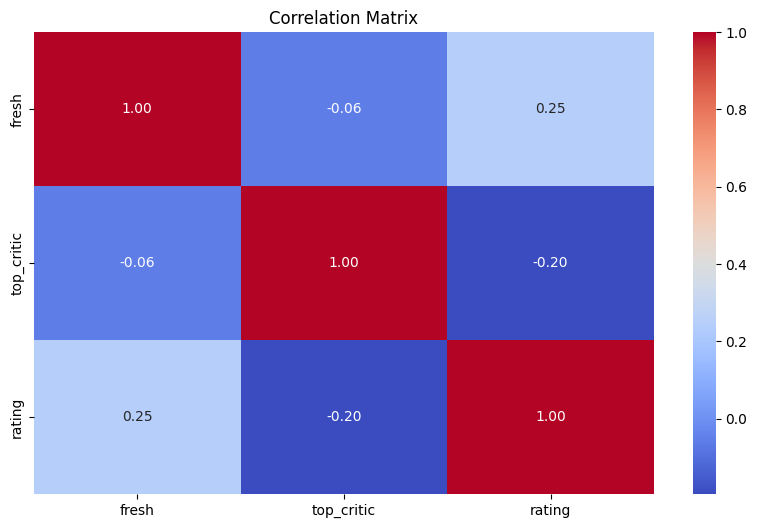

In [87]:
#correlation matrix
correlation_matrix = reviews_df[['fresh', 'top_critic', 'rating']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Frequency of reviews by publisher

In [88]:
#Publisher Frequency distribution using value count
publisher_count= reviews_df['publisher'].value_counts()
publisher_count

,count
publisher,
Efilmcritic.Com,673
Emanuellevy.Com,591
New York Times,590
Washington Post,565
Entertainment Weekly,541
...,...
El Fanzine,1
People'S World,1
New York Theatre Wire,1


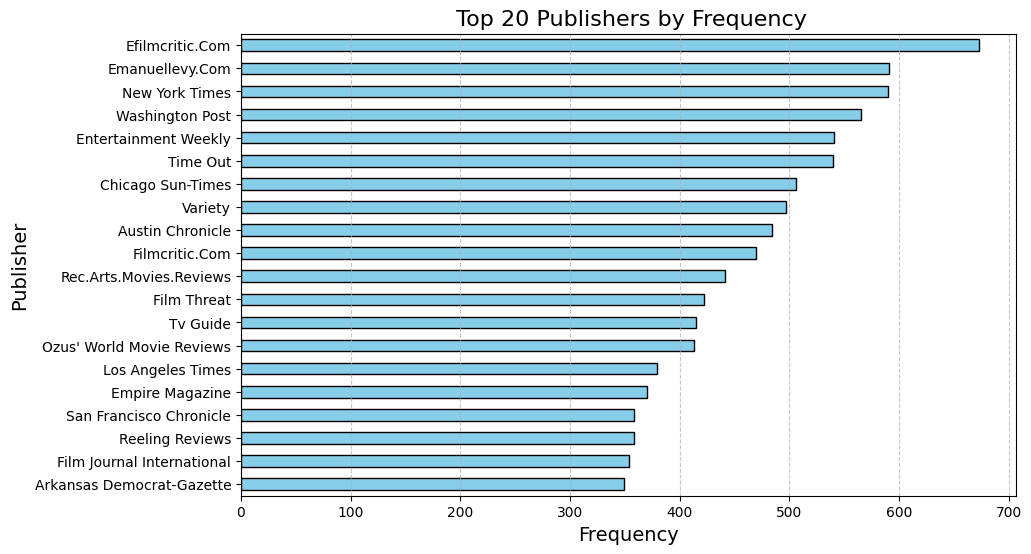

In [89]:
make_freq=reviews_df['publisher'].value_counts().head(20)
# create a horizontal bar chart
plt.figure(figsize=(10, 6))
make_freq.plot(kind='barh', color='skyblue', edgecolor='black')

# Customize the plot
plt.title(f" {'Top 20 Publishers'} by Frequency", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel('Publisher', fontsize=14)
# Invert the y-axis to show the highest value at the top
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Save as PNG
plt.savefig('plot.png', dpi=300)
plt.show()


#### Average rating by publisher

In [90]:
# Average Rating for each publisher
mean_ratings_by_publisher =reviews_df.groupby("publisher")["rating"].mean().reset_index()
mean_ratings_by_publisher

,publisher,rating
0,2Ue That Movie Show,3.900000
1,3Aw,2.761905
2,3Blackchicks Review,1.820513
3,48 Hills,-1.000000
4,4Columns,-1.000000
...,...,...
1277,Yahoo! Movies,4.000000
1278,Your Movies (Cleveland.Com),2.978723
1279,Zaki'S Corner,-1.000000
1280,Zap2It.Com,2.256410


##### Top Publishers by rating

In [91]:
# Top publishers sorted the publisher by mean rating in descending order
top_publishers = mean_ratings_by_publisher.sort_values(by="rating",ascending=False).head(10)
top_publishers

,publisher,rating
273,Cutprintfilm,9.0
20,Afterelton.Com,9.0
1059,Tampa Tribune,9.0
924,Rotten Tomatoes,9.0
911,Revolver,9.0
198,Cinemaobsession.Com,9.0
237,Colbybryant.Com,8.5
468,Gay.Com Uk,8.0
357,Entertainment Affair,8.0
883,Rave Reviews,8.0


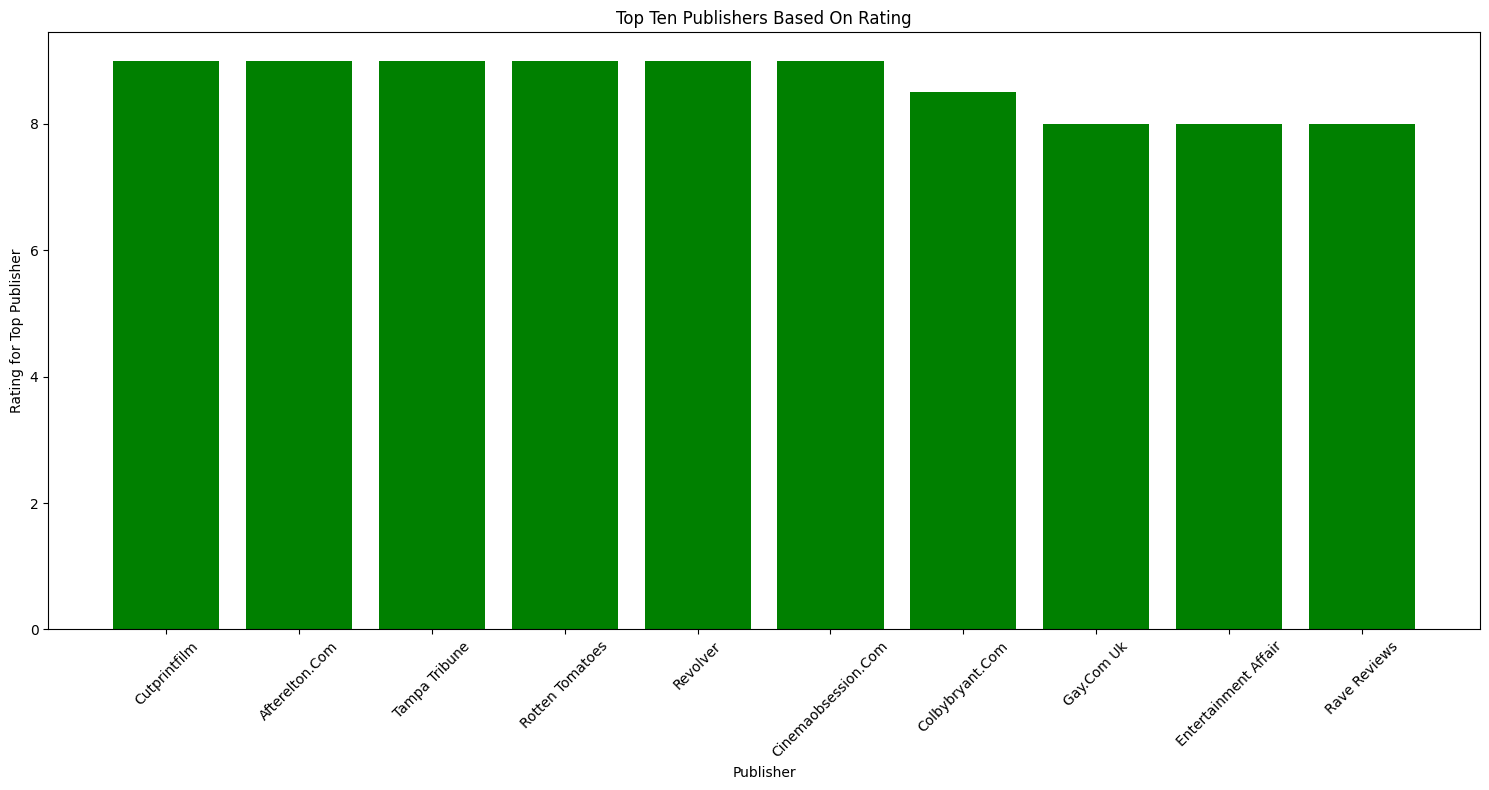

In [92]:
#plot the bar graph
plt.figure(figsize=(15,8))
plt.bar(top_publishers['publisher'], top_publishers['rating'], color='green')
# label axis and title
plt.xlabel('Publisher')
plt.ylabel('Rating for Top Publisher')
plt.title('Top Ten Publishers Based On Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Rating, Fresh and Top_critic frequency

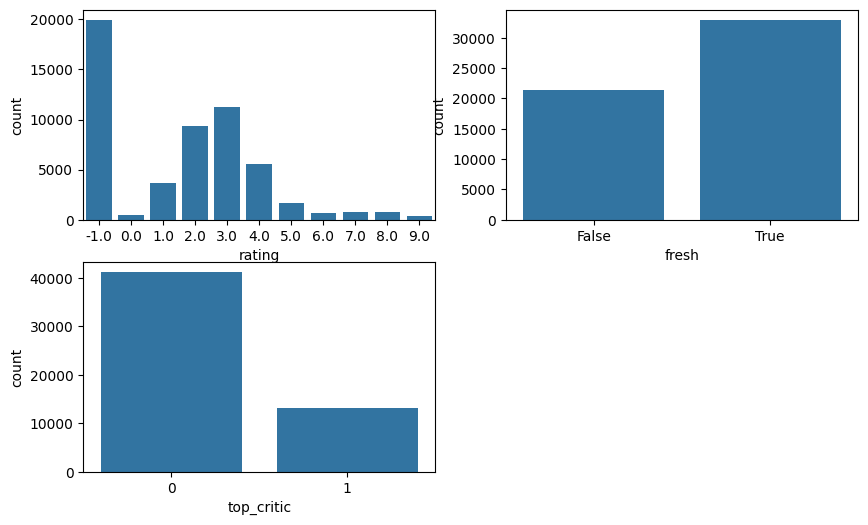

In [93]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.countplot(data=reviews_df,x="rating")
#Bar plot of fresh
plt.subplot(2,2,2)
sns.countplot(data=reviews_df,x="fresh")
#Bar plot of top_critic
plt.subplot(2,2,3)
sns.countplot(data=reviews_df,x="top_critic")
plt.show()

Based on rating most movies have a -1 of which was used as a placeholder that indicates most of the movies in the dataset where not rated since the percetange of place holder is much higher. But majority of the movies received a rating between 2-3 as per our rating count and the Bar Plot.


#### Average rating trend over time

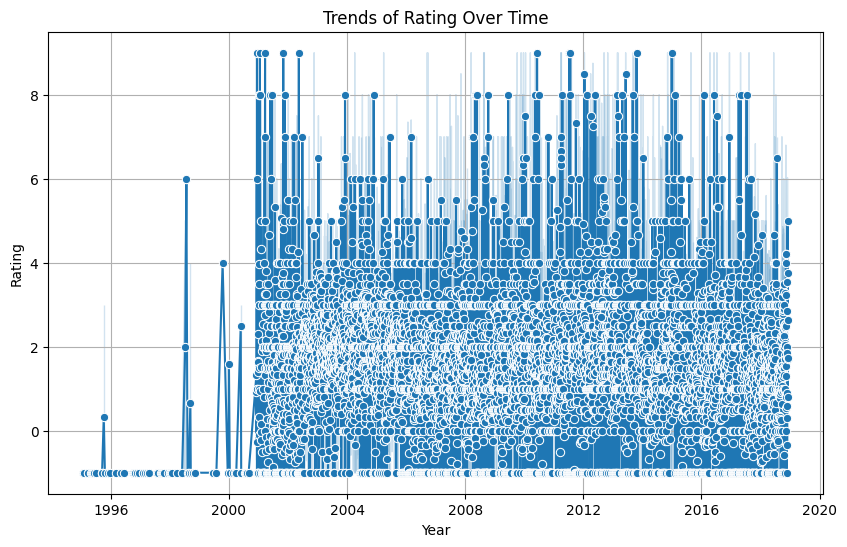

In [96]:
# Remove rows where date is 1995 or older
reviews_date_df = reviews_df[reviews_df['date'] > '1995-01-01']
# Plot rating over time (year)
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='rating', data=reviews_date_df, marker='o')
plt.title("Trends of Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

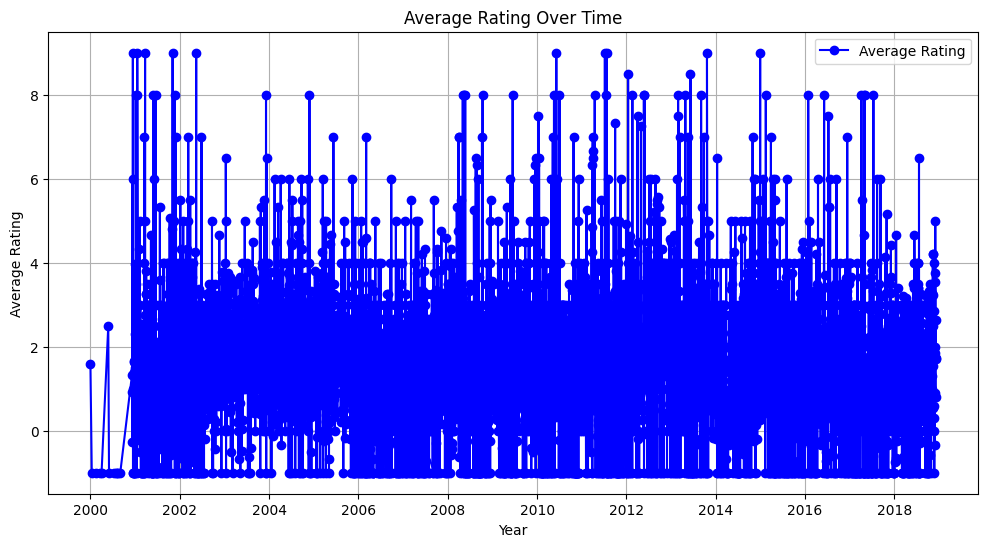

In [48]:
# Group by year and calculate average rating
yearly_ratings = reviews_df.groupby('date')['rating'].mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_ratings, marker='o', color='blue', label='Average Rating')
plt.title('Average Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid()
plt.legend()
plt.show()

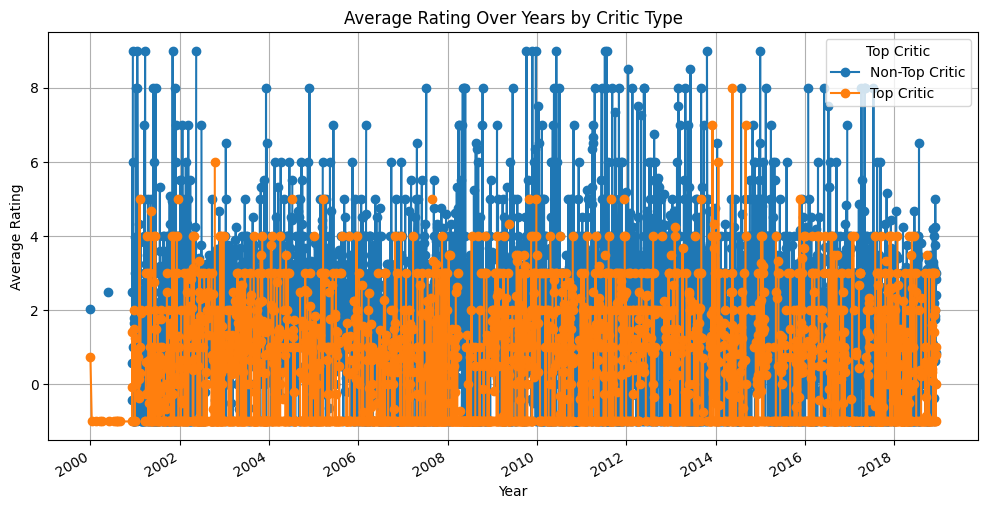

In [47]:
# Group by date and top_critic, then calculate average rating
ratings_by_year_and_critic = reviews_df.groupby(['date', 'top_critic'])['rating'].mean().unstack()

# Plot
ratings_by_year_and_critic.plot(figsize=(12, 6), marker='o')
plt.title('Average Rating Over Years by Critic Type')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Top Critic', labels=['Non-Top Critic', 'Top Critic'])
plt.grid()
plt.show()

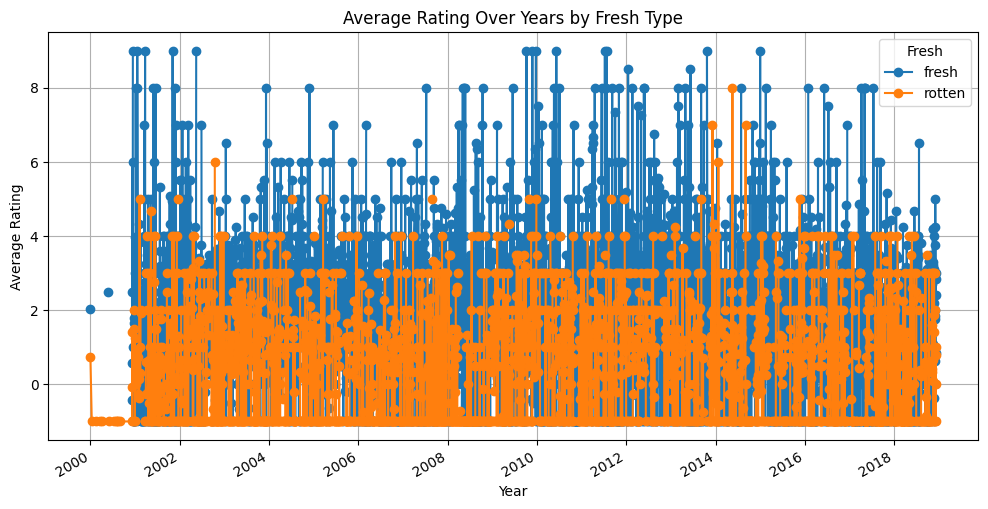

In [50]:
# Group by date and fresh, then calculate average rating
ratings_by_year_and_fresh = reviews_df.groupby(['date', 'fresh'])['rating'].mean().unstack()
# Plot
ratings_by_year_and_critic.plot(figsize=(12, 6), marker='o')
plt.title('Average Rating Over Years by Fresh Type')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Fresh', labels=['fresh', 'rotten'])
plt.grid()
plt.show()

### Logistic Regression
#### Fresh and Top critic
Measure the strength of the relationship between being a top critic and the likelihood of a fresh review:

**Null Hypothesis (H₀)**: Reviews from top critics do not differ in their likelihood of being fresh compared to regular critics.

**Alternative Hypothesis (H₁)**: Reviews from top critics are more likely to be fresh compared to regular critics.

In [55]:
# Define independent (X) and dependent (y) variables
X = reviews_df[["top_critic"]]  # independent variable
y = reviews_df["fresh"]        # dependent variable

# adding a constant for the logistic regression model
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Display the results
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.668458
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  fresh   No. Observations:                54281
Model:                          Logit   Df Residuals:                    54279
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                0.002402
Time:                        09:41:32   Log-Likelihood:                -36285.
converged:                       True   LL-Null:                       -36372.
Covariance Type:            nonrobust   LLR p-value:                 6.893e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5006      0.010     49.319      0.000       0.481       0.521
top_critic    -0.2702      0.

#### Observations
##### 1. Intercept (const): 0.5010
**Interpretation**: The log-odds of a review being "fresh" when top_critic is 0 (not a top critic) is 0.5010.

Odds Ratio:
$𝑒^{0.5010}$ ≈ 1.651

This means that, for reviews from non-top critics, the odds of being "fresh" are about 1.65 times higher than "not fresh."

##### 2. top_critic: -0.2716
**Interpretation**:A unit increase in top_critic (from 0 to 1) decreases the log-odds of a review being "fresh" by 0.2716.

Odds Ratio:
$𝑒^{-0.2716}$≈0.762

This means reviews by top critics are 23.8% less likely to be "fresh" compared to reviews by non-top critics.

#####3. The two coefficients are statistically significant since P-value<0.05.

#####4. Model Performance: The low pseudo R-squared value (0.002437) suggests that while top_critic is a statistically significant predictor, it explains a very small percentage (0.2437%) of the variability in the fresh outcome. There maybe other factors contributing to the classification of reviews as "fresh".




#### Fresh, Top critic and rating

**Null Hypothesis**: There is no significant effect of rating and top_critic on the likelihood of a review being classified as "fresh."

**Alternative Hypothesis** : At least one of rating or top_critic significantly affects the likelihood of a review being classified as "fresh."

In [61]:
# Define predictors and the dependent variable
X = reviews_df[['top_critic', 'rating']]  # Include 'rating'
X = sm.add_constant(X)  # Add constant term (intercept)
y = reviews_df['fresh']
# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()
# Display the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.638368
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  fresh   No. Observations:                54281
Model:                          Logit   Df Residuals:                    54278
Method:                           MLE   Df Model:                            2
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                 0.04731
Time:                        10:29:18   Log-Likelihood:                -34651.
converged:                       True   LL-Null:                       -36372.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1183      0.012      9.696      0.000       0.094       0.142
top_critic    -0.0532      0.

### Observations
The P-values for all the coefficients are less than 0.05 level of significance, meaning that they are all statistically significant.

Top Critics: Although the coefficient for top_critic is negative (-0.0532), it is statistically significant, indicating that top critics tend to be slightly less likely to give a "fresh" review compared to non-top critics, but the effect is relatively small.

Rating: The coefficient for rating (0.2332) shows that higher ratings are strongly associated with reviews being fresh. The effect of rating is much stronger than that of top_critic.

pseudo R-squared value of 0.04731 suggests that the model explains approximately 4.73% of the variability in the freshness outcome. It suggests that the model explains only a small portion of the variability in the freshness outcome. The two significant predictors suggest that there is still value in using the model for insights, even if the fit could be improved.

